# Visualizing Datasets Using Heatmaps

## Setup and Data Cleaning

You can expand this group to see how the dataframe gets set up.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pokedex = pd.read_csv('https://raw.githubusercontent.com/lgreski/pokemonData/master/Pokemon.csv', index_col=[0, 1])
pokedex.head()

,,Form,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
ID,Name,,,,,,,,,,,
1,Bulbasaur,,Grass,Poison,318,45,49,49,65,65,45,1
2,Ivysaur,,Grass,Poison,405,60,62,63,80,80,60,1
3,Venusaur,,Grass,Poison,525,80,82,83,100,100,80,1
4,Charmander,,Fire,,309,39,52,43,60,50,65,1
5,Charmeleon,,Fire,,405,58,64,58,80,65,80,1


In [3]:
# Rename Type1 and Type2 to Type 1 and Type 2
pokedex.rename(columns={'Type1': 'Type 1', 'Type2': 'Type 2'}, inplace=True)
pokedex.head()

,,Form,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
ID,Name,,,,,,,,,,,
1,Bulbasaur,,Grass,Poison,318,45,49,49,65,65,45,1
2,Ivysaur,,Grass,Poison,405,60,62,63,80,80,60,1
3,Venusaur,,Grass,Poison,525,80,82,83,100,100,80,1
4,Charmander,,Fire,,309,39,52,43,60,50,65,1
5,Charmeleon,,Fire,,405,58,64,58,80,65,80,1


In [4]:
# Use regex to replace blank spaces with NaN
pokedex.replace(r'^\s*$', np.nan, regex=True, inplace=True)
pokedex.head()

,,Form,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
ID,Name,,,,,,,,,,,
1,Bulbasaur,NaN,Grass,Poison,318,45,49,49,65,65,45,1
2,Ivysaur,NaN,Grass,Poison,405,60,62,63,80,80,60,1
3,Venusaur,NaN,Grass,Poison,525,80,82,83,100,100,80,1
4,Charmander,NaN,Fire,NaN,309,39,52,43,60,50,65,1
5,Charmeleon,NaN,Fire,NaN,405,58,64,58,80,65,80,1


## Assignment

You're given a dataframe, `pokedex` that has been cleaned for you. Use `.head()`, `.info()`, and `.describe()` to get a feel for the data below:

In [5]:
pokedex.head()

,,Form,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
ID,Name,,,,,,,,,,,
1,Bulbasaur,NaN,Grass,Poison,318,45,49,49,65,65,45,1
2,Ivysaur,NaN,Grass,Poison,405,60,62,63,80,80,60,1
3,Venusaur,NaN,Grass,Poison,525,80,82,83,100,100,80,1
4,Charmander,NaN,Fire,NaN,309,39,52,43,60,50,65,1
5,Charmeleon,NaN,Fire,NaN,405,58,64,58,80,65,80,1


In [6]:
pokedex.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,441.206868,70.887772,80.948911,74.587102,72.876884,72.128141,69.778057,4.989950
std,121.015326,26.859651,32.122250,30.678626,32.696051,27.628468,30.195593,2.564161
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,330.000000,52.000000,56.000000,51.250000,50.000000,50.000000,45.000000,3.000000
50%,460.500000,70.000000,80.000000,70.000000,65.000000,70.000000,67.500000,5.000000
75%,520.000000,85.000000,100.000000,90.000000,95.000000,90.000000,90.750000,7.000000
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,9.000000


In [7]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1194 entries, (1, 'Bulbasaur') to (1010, 'Iron Leaves')
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Form        222 non-null    object
 1   Type 1      1194 non-null   object
 2   Type 2      652 non-null    object
 3   Total       1194 non-null   int64 
 4   HP          1194 non-null   int64 
 5   Attack      1194 non-null   int64 
 6   Defense     1194 non-null   int64 
 7   Sp. Atk     1194 non-null   int64 
 8   Sp. Def     1194 non-null   int64 
 9   Speed       1194 non-null   int64 
 10  Generation  1194 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 187.7+ KB


How is the *index* of this Dataframe different from previous ones we've worked with? (If you can't tell from the previous cell's output, inspect the code loading the Pokemon data at the beginning of the notebook)

In [8]:
# The index in this dataframe is different becuase when you run the .info(), you can clearly see the pokemon index that is null or non-null. 

### Augmenting the Dataframe

For each *combat* stat, (HP, Attack, Defense, Sp. Atk, Sp. Def, and Speed), create an appropriately named *categorical* column labeling that statistic by *quintile*; i.e. 'low', 'mid low', 'mid', 'mid high', 'high'.

In [9]:
# List of columns for combat stat questions
combat_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for i in combat_cols:   
    pokedex[i + ' category'] = pd.qcut(pokedex[i], q= 5, labels=['low','mid low', 'mid', 'mid high', 'high'])
pokedex.head()

,,Form,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,HP category,Attack category,Defense category,Sp. Atk category,Sp. Def category,Speed category
ID,Name,,,,,,,,,,,,,,,,,
1,Bulbasaur,NaN,Grass,Poison,318,45,49,49,65,65,45,1,low,low,low,mid,mid,mid low
2,Ivysaur,NaN,Grass,Poison,405,60,62,63,80,80,60,1,mid low,mid low,mid low,mid high,mid high,mid low
3,Venusaur,NaN,Grass,Poison,525,80,82,83,100,100,80,1,mid high,mid,mid high,mid high,high,mid high
4,Charmander,NaN,Fire,NaN,309,39,52,43,60,50,65,1,low,low,low,mid low,low,mid
5,Charmeleon,NaN,Fire,NaN,405,58,64,58,80,65,80,1,mid low,mid low,mid low,mid high,mid,mid high


### Pivot Tables:

Create a pivot table called `mean_stats_by_gen` that shows the mean value of each *combat stat* broken down by generation. 

In [10]:
mean_stats_by_gen = pd.pivot_table(pokedex, index= 'Generation',values= combat_cols , aggfunc= 'mean')
mean_stats_by_gen    

,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
Generation,,,,,,
1,72.913907,68.225166,64.211921,67.139073,66.086093,69.066225
2,68.260000,69.690000,70.980000,64.500000,72.340000,61.410000
3,73.936170,69.475177,65.425532,68.907801,67.042553,63.460993
4,79.127119,76.584746,72.220339,74.508475,75.754237,69.703390
5,82.442424,72.078788,71.709091,71.987879,68.309091,68.369697
6,94.923664,87.877863,72.549618,89.274809,84.358779,76.625954
7,86.508197,78.278689,70.434426,74.573770,73.819672,69.278689
8,86.197279,76.829932,75.380952,74.979592,73.931973,73.476190
9,82.285714,73.142857,76.378151,69.126050,69.915966,75.630252


Create a pivot table called `best_stats_by_type` that shows the maximum value of each combat stat broken down by `Type 1`

In [11]:
best_stats_by_type = pd.pivot_table(data=pokedex, index = 'Type 1', values = combat_cols, aggfunc= 'max' )
best_stats_by_type

,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,185,230,107,145,230,160
Dark,150,125,223,140,135,135
Dragon,180,130,216,180,150,142
Electric,123,115,109,173,115,200
Fairy,150,115,126,135,154,148
Fighting,145,140,154,140,140,138
Fire,160,140,115,159,154,126
Flying,115,105,98,125,95,123
Ghost,165,145,150,170,135,135


Create a pivot table called `type_distribution` that shows the number of Pokemon having each combination of `Type 1` and `Type 2`. All `NaN` values should be replaced with `0`.

In [23]:

type_distribution = pd.pivot_table(pokedex, index= 'Type 1', columns= 'Type 2', values= 'Total', aggfunc= 'count').sort_index(ascending=False).fillna(0)
type_distribution

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,
Water,2.0,8.0,5.0,2.0,4.0,4.0,0.0,7.0,4.0,3.0,10.0,4.0,0.0,3.0,7.0,5.0,1.0,0.0
Steel,0.0,0.0,5.0,0.0,4.0,1.0,0.0,2.0,5.0,0.0,2.0,0.0,0.0,2.0,7.0,3.0,0.0,0.0
Rock,2.0,2.0,2.0,4.0,3.0,1.0,2.0,6.0,0.0,2.0,6.0,2.0,0.0,3.0,2.0,0.0,4.0,6.0
Psychic,0.0,1.0,1.0,0.0,9.0,3.0,1.0,9.0,4.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0
Poison,1.0,5.0,4.0,0.0,1.0,2.0,2.0,3.0,0.0,0.0,4.0,0.0,2.0,0.0,2.0,0.0,0.0,3.0
Normal,0.0,0.0,1.0,0.0,5.0,4.0,0.0,31.0,2.0,2.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0
Ice,2.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,4.0,1.0,2.0,4.0
Ground,0.0,3.0,2.0,1.0,0.0,1.0,1.0,4.0,4.0,2.0,0.0,0.0,1.0,0.0,2.0,3.0,5.0,0.0
Grass,0.0,5.0,5.0,0.0,5.0,5.0,1.0,7.0,3.0,0.0,1.0,3.0,3.0,15.0,3.0,0.0,3.0,0.0


Create a pivot table called `hp_speed_distribution` that shows the number of Pokemon having each combination of HP and Speed quintile. *e.g.* 'low' HP and 'low' Speed

In [17]:
hp_speed_distribution = pd.pivot_table(pokedex, index = 'HP category', columns= 'Speed category', values = 'Total', aggfunc= 'count').sort_index(ascending= False)
hp_speed_distribution

Speed category,low,mid low,mid,mid high,high
HP category,,,,,
high,33,53,26,52,55
mid high,26,45,44,69,75
mid,31,43,44,54,59
mid low,60,41,22,29,37
low,97,88,63,35,13


### Heatmaps:

Use the pivot tables you created in the previous section to generate heatmaps. Make sure each heatmap has annotations turned on and has axes that are ordered appropriately!

Generate a heatmap showing the number of Pokemon with each type combination. 

<Axes: xlabel='Type 2', ylabel='Type 1'>

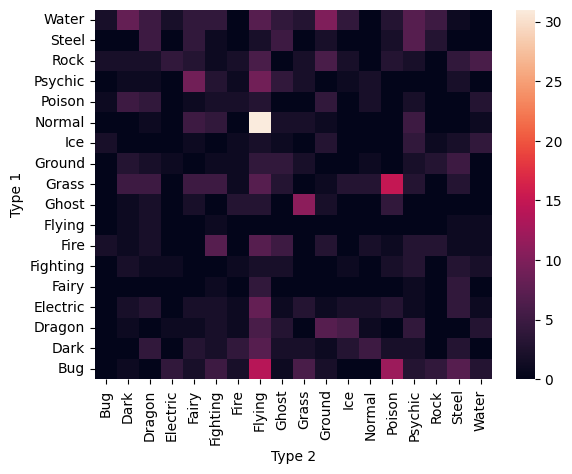

In [24]:
sns.heatmap(type_distribution)

Generate a heatmap showing the distribution of HP vs Speed quintiles.

<Axes: xlabel='Speed category', ylabel='HP category'>

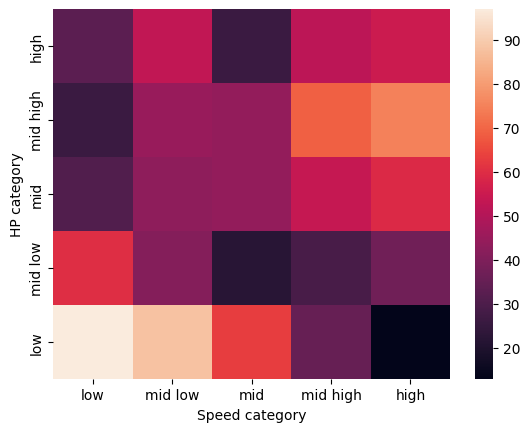

In [19]:
sns.heatmap(hp_speed_distribution)

### Correlation Matrix

Create a correlation matrix for the combat stats in the dataframe.

<Axes: >

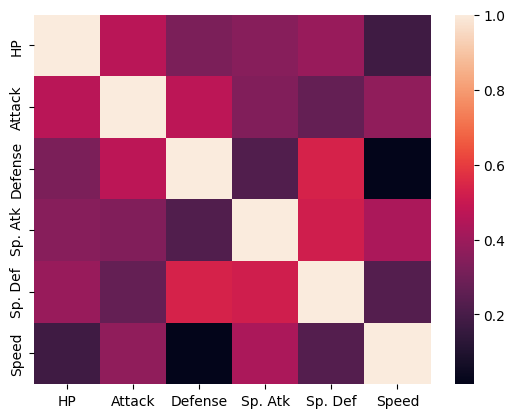

In [28]:
sns.heatmap(pokedex[combat_cols].corr())


Which stats are most strongly correlated?

<Axes: xlabel='Sp. Def', ylabel='Sp. Atk'>

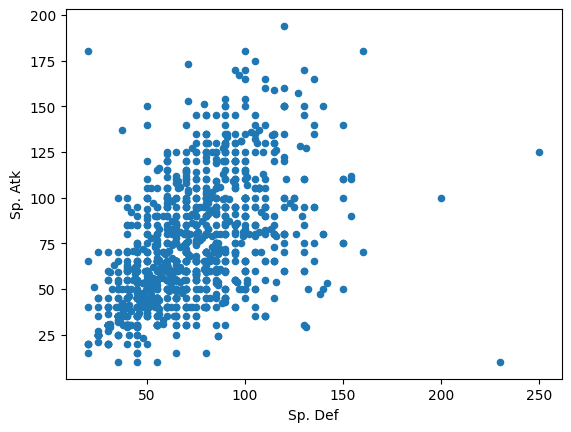

In [30]:
pokedex.plot.scatter(x = 'Sp. Def', y = 'Sp. Atk')